In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neural_network import MLPClassifier
data = pd.read_csv("BreastCancerData.csv")
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [16]:
y = data['diagnosis']
x = data.drop(['id', 'diagnosis','Unnamed: 32'], axis='columns')
scaler = StandardScaler()
scaler.fit(x)
x1 = scaler.transform(x.values)
x1 = pd.DataFrame(data=x1)
x1.columns = x.columns

In [3]:
parameters = {'hidden_layer_sizes': [3, 10, 30, 100],
              'activation': ['identity', 'logistic', 'relu'],
              'alpha': 10.0 ** -np.arange(1, 6)}
mlp = MLPClassifier(max_iter=10000)
clf = GridSearchCV(mlp, parameters)
clf.fit(x1, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=10000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_...shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'ac

In [4]:
result = pd.DataFrame(clf.cv_results_)
result.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.276236,0.029941,0.001050,0.000033,logistic,0.1,30,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.982456,0.973684,0.991228,0.973684,0.991150,0.982441,0.007829,1
46,0.391541,0.043368,0.001083,0.000066,relu,0.01,30,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.991228,0.973684,0.982456,0.973684,0.991150,0.982441,0.007829,1
12,0.221780,0.016538,0.000952,0.000024,identity,0.0001,3,"{'activation': 'identity', 'alpha': 0.0001, 'h...",0.982456,0.973684,0.982456,0.973684,0.991150,0.980686,0.006539,3
1,0.200105,0.041698,0.001050,0.000100,identity,0.1,10,"{'activation': 'identity', 'alpha': 0.1, 'hidd...",0.991228,0.964912,0.982456,0.973684,0.991150,0.980686,0.010214,3
52,0.662823,0.304705,0.001018,0.000002,relu,0.0001,3,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.973684,0.982456,0.991228,0.973684,0.982301,0.980671,0.006556,5
40,0.322531,0.017922,0.001062,0.000046,relu,0.1,3,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.982456,0.973684,0.991228,0.973684,0.982301,0.980671,0.006556,5
44,0.649272,0.240040,0.001021,0.000005,relu,0.01,3,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.982456,0.982456,0.982456,0.973684,0.982301,0.980671,0.003494,7
2,0.198779,0.022163,0.000997,0.000023,identity,0.1,30,"{'activation': 'identity', 'alpha': 0.1, 'hidd...",0.973684,0.982456,0.982456,0.973684,0.982301,0.978916,0.004272,8
23,0.380776,0.029585,0.001196,0.000005,logistic,0.1,100,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.982456,0.973684,0.982456,0.973684,0.982301,0.978916,0.004272,8
21,0.356672,0.011560,0.001020,0.000017,logistic,0.1,10,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.982456,0.973684,0.991228,0.973684,0.973451,0.978901,0.007053,10


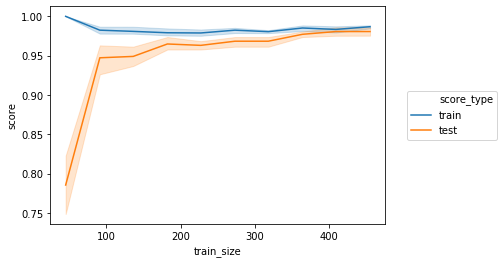

In [8]:
#MLP = MLPClassifier(max_iter=10000, activation='logistic', alpha=0.1, hidden_layer_sizes=30)
clf = MLPClassifier(max_iter=10000, activation='logistic', alpha=0.1, hidden_layer_sizes=30)
lc = learning_curve(clf, x1, y, train_sizes = np.linspace(0.1, 1.0, 10), return_times=True)
train_sizes, train_scores, test_scores, fit_times, score_times = lc
c1 = train_sizes.tolist()*5
c2 = train_scores.flatten('F')
c3 = test_scores.flatten('F')
df1 = pd.DataFrame({'train_size':c1, 'score':c2, 'score_type':'train'})
df2 = pd.DataFrame({'train_size':c1, 'score':c3, 'score_type':'test'})
df = pd.concat([df1,df2])
g = sns.lineplot(data = df, x = 'train_size', y = 'score', hue = 'score_type')
g.legend(loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [3]:
##########
# plot confusion matrix
##########
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x1, y, random_state=0)
clf = MLPClassifier(max_iter=10000, activation='logistic', alpha=0.1, hidden_layer_sizes=30)
clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=30, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

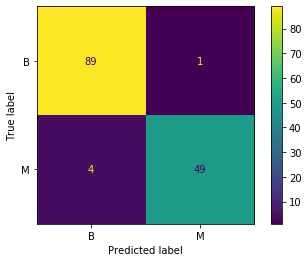

In [15]:
disp = plot_confusion_matrix(clf, x_test, y_test,values_format='.4g')
plt.show()